<a href="https://colab.research.google.com/github/Deepachowdhari/MyProjects/blob/main/Seasonality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
df=pd.read_csv("/content/Florida_Temperature.csv")

In [ ]:
df.head()

,COOPID,YEAR,MONTH,DAY,meanTemp
0,86628,2020,1,1,62.0
1,86628,2020,1,2,68.0
2,86628,2020,1,3,75.5
3,86628,2020,1,4,71.5
4,86628,2020,1,5,56.0


In [ ]:
df.columns

Index(['COOPID', ' YEAR', ' MONTH', ' DAY', ' meanTemp'], dtype='object')

In [ ]:
df.columns=df.columns.str.strip()

In [ ]:
df.columns

Index(['COOPID', 'YEAR', 'MONTH', 'DAY', 'meanTemp'], dtype='object')

In [ ]:
df["Date"]=pd.to_datetime(df[["YEAR","MONTH","DAY"]],coe)

In [ ]:
df.head()

,COOPID,YEAR,MONTH,DAY,meanTemp,Date
0,86628,2020,1,1,62.0,2020-01-01
1,86628,2020,1,2,68.0,2020-01-02
2,86628,2020,1,3,75.5,2020-01-03
3,86628,2020,1,4,71.5,2020-01-04
4,86628,2020,1,5,56.0,2020-01-05


In [ ]:
df.isna().sum()

,0
COOPID,0
YEAR,0
MONTH,0
DAY,0
meanTemp,0
Date,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   COOPID    1462 non-null   int64         
 1   YEAR      1462 non-null   int64         
 2   MONTH     1462 non-null   int64         
 3   DAY       1462 non-null   int64         
 4   meanTemp  1462 non-null   float64       
 5   Date      1462 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 68.7 KB


In [ ]:
df['meanTemp']<0

,meanTemp
0,False
1,False
2,False
3,False
4,False
...,...
1457,False
1458,False
1459,False
1460,False


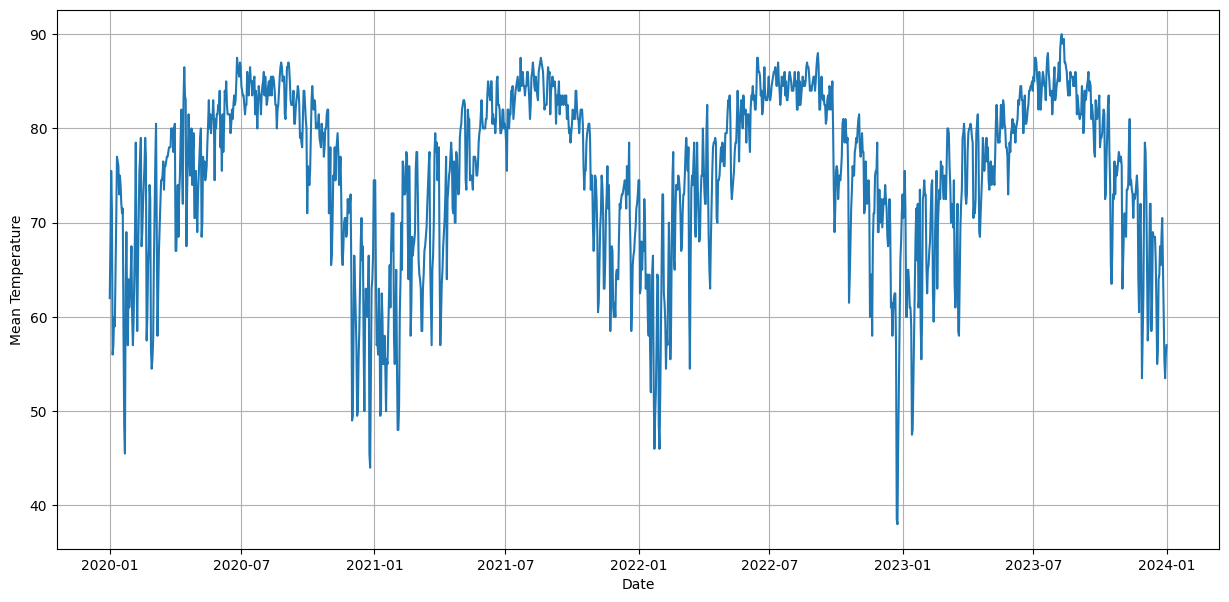

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(df['Date'],df['meanTemp'])
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.grid()
plt.show()

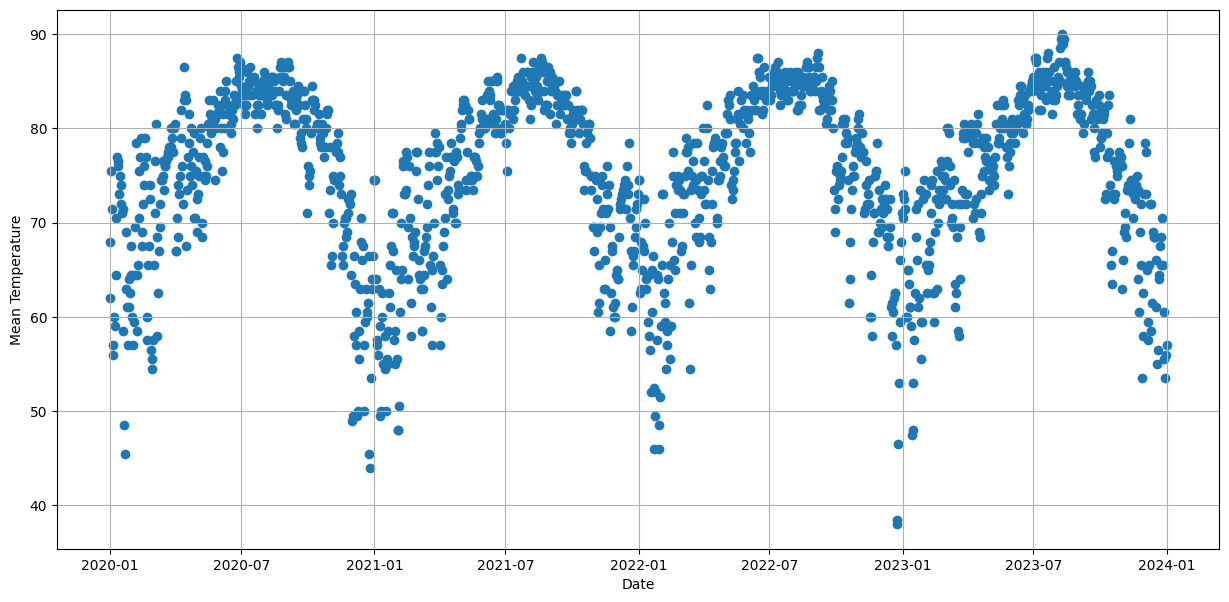

In [ ]:
plt.figure(figsize=(15,7))
plt.scatter(df['Date'],df['meanTemp'])
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.grid()
plt.show()

In [ ]:
#subset of data
df1=df[(df['Date']>='2022-01-01') & (df['Date']<='2024-12-31')]

In [ ]:
df1.shape

(731, 6)

In [ ]:
#ADF Test

adf_test=adfuller(df1['meanTemp'])
print(adf_test[1])

0.6066838812943995


In [ ]:
if adf_test[1]>0.05:
  print("Data is not sationary")
else:
  print("Data is stationary")

Data is not sationary


In [ ]:
#summary stats by season

def get_season(month):
  if month in [12,1,2]:
    return "Winter"
  elif month in [3,4,5]:
    return "Spring"
  elif month in [6,7,8]:
    return "Summer"
  else:
    return "Fall"



In [ ]:
df1['Season']=df1['Date'].dt.month.apply(get_season)

<ipython-input-28-53c02486cbd8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Season']=df1['Date'].dt.month.apply(get_season)


In [ ]:
seasonal=df1.groupby('Season')['meanTemp'].mean()

In [ ]:
print(seasonal)

Season
Fall      76.521978
Spring    75.562500
Summer    84.301630
Winter    65.113260
Name: meanTemp, dtype: float64


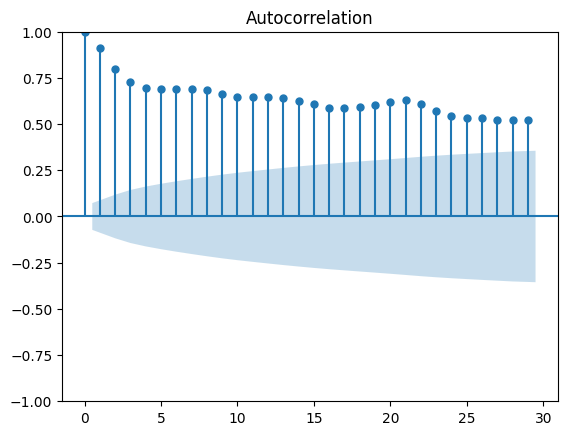

In [ ]:
#acf and pacf plots
import matplotlib.pyplot as plt
plot_acf(df1['meanTemp'])
plt.show()

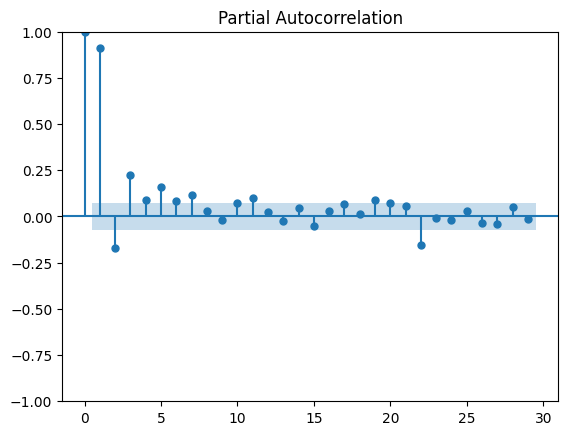

In [ ]:
plot_pacf(df1['meanTemp'])
plt.show()

In [ ]:
#differencing
df1['meanTemp_diff']=df1['meanTemp'].diff()

<ipython-input-37-6012407be956>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['meanTemp_diff']=df1['meanTemp'].diff()


<ipython-input-41-7303258c40b7>:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


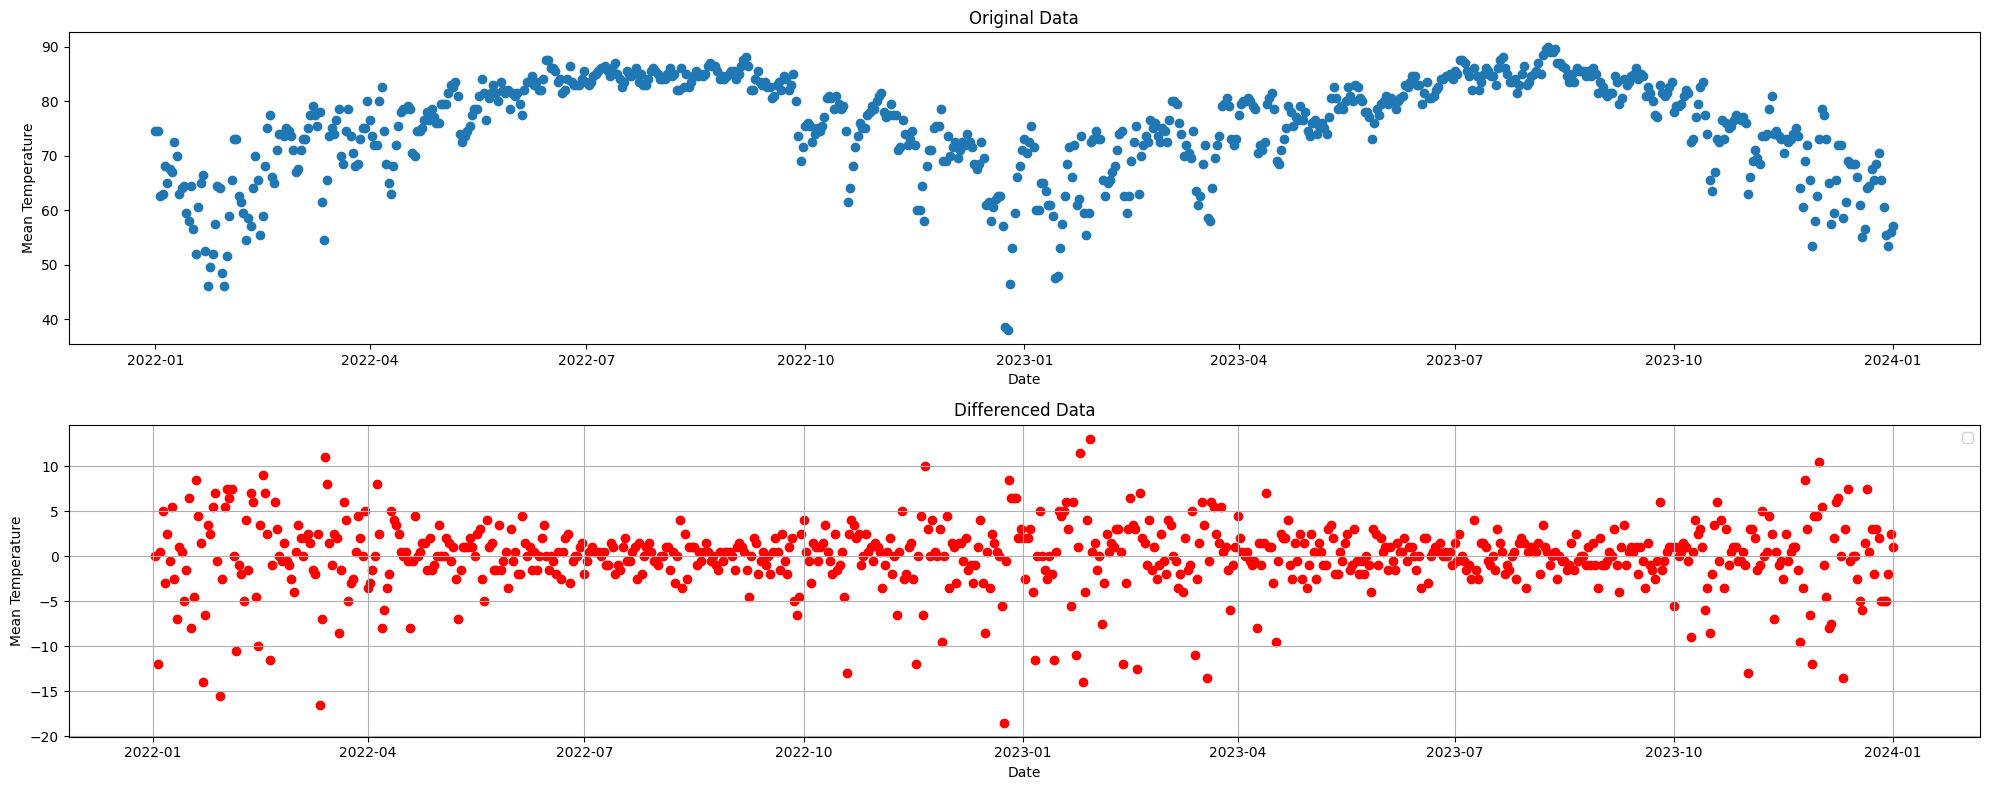

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
plt.scatter(df1['Date'],df1['meanTemp'])
plt.title("Original Data")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")

plt.subplot(2,1,2)
plt.scatter(df1['Date'],df1['meanTemp_diff'],color='r')
plt.title("Differenced Data")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.tight_layout()
plt.legend()
plt.grid()
plt.show()